## VK API

API -- an Application Programming Interface, интерфейс или протокол коммуникации между клиентом и сервером, средство для автоматизированного обращения к приложению (сайту). Клиент делает запрос в определённом формате и получает ответ в определённом формате.

У Twitter, VK, YouTube есть API -- большая удача для нас, лингвистов, так как мы заинтересованы в скачивании актуальных лингвистических данных. Сегодня будем работать с VK API.

* Документация VK API: https://vk.com/dev/openapi

* VK API был изначально придуман для создания веб-приложений на сторонних сайтах, которые могли бы взаимодействовать с vk.com

* Мы будем его использовать для выкачивания текстов и метаинформации.

* На сайте vk.com есть специальные страницы, которые не предназначены для того, чтобы их открывать браузером, они ожидают именно автоматического обращения. 

* Что значит автоматическое обращение? Это то самое, что мы проходили, когда учились выкачивать Интернет: программа на питоне (но в теории может быть и не на питоне) посылает серверу запрос, договаривается с ним и получает ответ.

* Вспомним, что для произвольной страницы это выглядит так:

In [1]:
import urllib.request  # импортируем модуль
req = urllib.request.Request('https://habrahabr.ru/') # посылаем запрос
with urllib.request.urlopen(req) as response: # открываем соединение с сайтом
    html = response.read().decode('utf-8') # "читаем" ответ сервера (сайта) в переменную html
print(html[:210])

<!DOCTYPE html>
<html lang="ru" class="no-js">
  <head>
    <meta http-equiv="content-type" content="text/html; charset=utf-8" />
<meta content='width=1024' name='viewport'>
<title>Лучшие публикации за сутки / 


* Для взаимодействия с vk.com нам потребуется тот же самый модуль urllib.request, а страницы, к которым мы будем обращаться, описаны в [документации VK API](https://vk.com/dev/openapi).
* Инструкция по работе с VK API для начинающих разработчиков: https://vk.com/dev/first_guide
* Но есть одна хитрость. Она в том, что страницы, к которым мы будем обращаться, ожидают не просто обращения, а передачи определённых параметров. Это логично: мы же должны сказать системе, что мы точно хотим сделать. Например, мы хотим получить какое-то количество записей со стены определённого пользователя. Тогда нужно сообщить, какой это пользователь. 
* Ссылка на создание приложения для токена: [https://vk.com/editapp?act=create
](https://vk.com/editapp?act=create).


#### Передача параметров

* Как передать эти параметры сайту? 
* Для этого тоже есть стандартные средства, но уже не придуманные разработчиками сайта, а прописанные в протоколе HTTP давным-давно. Выглядит это так. В строке адреса, например, в браузере мы сначала пишем имя протокола (http или https), которое отделяется от всего, что идёт дальше последовательностью "://", потом пишется доменное имя (по сути, основной адрес сайта), к которому мы хотим обратиться (например, vk.com, после точки следует т.н. доменная зона), после косой черты далее следует адрес собственно страницы на сайте, к которой мы хотим обратиться: https://api.vk.com/method/wall.get 
* А вот после адреса страницы мы можем в той же адресной строке передать уже собственно параметры. 
* Место, где передаются параметры, отделяется от адреса страницы с помощью знака вопроса, а сами выглядят как пары ключ-значение, где ключ отделяется от значения с помощью знака равно: https://api.vk.com/method/wall.get?owner_id=1 
* Здесь есть параметр ```owner_id```, который указывает на пользователя, стену которого мы хотим скачать, и значение этого параметра 1, то есть речь идёт об основателе соцсети и первом её пользователе Павле Дурове, страница которого открывается по адресу https://vk.com/id1. 
* Такой номер, то есть уникальный идентификатор (id) есть у каждого пользователя и у каждого сообщества.
* Если есть необходимость передать сразу несколько параметров, то они должны отделяться друг от друга знаком "амперсанд", то есть ```&```: https://api.vk.com/method/wall.get?owner_id=1&count=10. Здесь появился второй параметр ```count```, который говорит, что мы хотим скачать именно 10 записей со стены пользователя.
* Так же выглядит и строка адреса при поисковом запросе, например, в Яндексе: https://yandex.ru/search/?text=соцсети

#### Авторизация

* Чтобы получить доступ к контенту Вконтакте, пользователь должен авторизоваться. То же самое и с приложением: мы не можем отправлять запросы просто так, для этого нужно зарегистрировать приложение и получить т.н. сервисный токен — ключ доступа, по которому VK API будет отдавать нам информацию. Это сделано для защиты данных.

* Сервисный токен выглядит примерно так: 8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8. Он действует сутки, после чего нужно получить новый токен на странице настроек приложения. Токен указывается в параметре ```access_token``` для любого запроса.
* Как получить токен, написано [здесь](https://vk.com/dev/first_guide?f=3.%20%D0%90%D0%B2%D1%82%D0%BE%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%20%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8F). Надо создать приложение, зайти в настройки и скопировать токен.

#### Версии API

* VK API постоянно развивается: вместе с появлением новых функций в самой соцсети появляются и новые методы для программной работы с ними. 

* Версию API также необходимо указывать в любом запросе; за это отвечает параметр ```v```, например ```v=5.52```. 

* Последня версия на данный момент — 5.103, а полный их список можно посмотреть [здесь](https://vk.com/dev/versions).

#### Поехали!

* Для начала, давайте скачаем 20 постов со стены Павла Дурова. 

* Какой метод будем использовать? Список всех методов: https://vk.com/dev/methods

* Чтобы скачивать записи со стен, у нас есть специальный метод VK API, он называется ```wall.get``` и выглядит как специальная страница на сайте vk.com: https://api.vk.com/method/wall.get 

* Как работает этот метод, рассказано на его странице в документации: https://vk.com/dev/wall.get Среди полезного там есть список обязательных параметров, которые нужно передать методу, чтобы он сработал.

* Часть адреса https://api.vk.com/method/ можно запомнить. Все остальные методы просто добавляются к нему: https://api.vk.com/method/wall.getComments, https://api.vk.com/method/wall.getById и т.д.

In [6]:
import requests

In [5]:
TOKEN = 'your-token-here'

In [17]:
data = requests.get(
    'https://api.vk.com/method/wall.get', 
    params={
        "owner_id": 1,
        "count": 2,
        "v":"5.92",
        "access_token": TOKEN
        
    }
).json()

In [18]:
data

{'response': {'count': 283,
  'items': [{'id': 2442097,
    'from_id': 1,
    'owner_id': 1,
    'date': 1525805964,
    'post_type': 'post',
    'text': 'Иногда говорят, что Telegram был заблокирован в России, так как “закон есть закон”. Однако Telegram заблокирован в России как раз вопреки главному закону страны – Конституции. Решения судов и законы, противоречащие Конституции, не имеют силы. А это значит, что и сама блокировка Telegram незаконна. \n\nЕсли бы ФСБ ограничилась запросом информации о нескольких террористах, то ее требование вписывалось бы в рамки Конституции. Однако речь идет о передаче универсальных ключей шифрования с целью последующего бесконтрольного доступа к переписке неограниченного круга лиц. A это – прямое нарушение 23-й статьи Конституции о праве каждого на тайну переписки.\n\nПо этой причине юристы из “Агоры” сегодня обжаловали решение Верховного суда России о законности приказа ФСБ. Надеюсь, власти России откажутся от языка неисполнимых ультиматумов, на кото

Если вглядеться, то выйдет, что это просто питоновский словарь с ключом "response" и значением в виде другого словаря. Но так ли это?

#### Извлечение информации

* Мы получили какой-то ответ от API и даже превратили его в структуру данных, с которой удобно работать в питоне. 

* Но что в этой структуре лежит? Обычно это json, в котором всё устроено как вложенные друг в друга словари и массивы, где ключи — это какое-то общепонятное слово, а значение — собственно информация. 

* Подробно это описано в документации к API, но часто всё понятно и без дополнительных объяснений. 

* В переменной ```data``` лежит словарь со всеми данными, которые получили в ответ на запрос: ключ в этом словаре — ```response```, а значение — другой словарь с параметрами ответа. Одним из ключей является ```items```, а его значение — список с нашими постами и всех их параметрами.

In [20]:
data['response']['items'][0]

{'id': 2442097,
 'from_id': 1,
 'owner_id': 1,
 'date': 1525805964,
 'post_type': 'post',
 'text': 'Иногда говорят, что Telegram был заблокирован в России, так как “закон есть закон”. Однако Telegram заблокирован в России как раз вопреки главному закону страны – Конституции. Решения судов и законы, противоречащие Конституции, не имеют силы. А это значит, что и сама блокировка Telegram незаконна. \n\nЕсли бы ФСБ ограничилась запросом информации о нескольких террористах, то ее требование вписывалось бы в рамки Конституции. Однако речь идет о передаче универсальных ключей шифрования с целью последующего бесконтрольного доступа к переписке неограниченного круга лиц. A это – прямое нарушение 23-й статьи Конституции о праве каждого на тайну переписки.\n\nПо этой причине юристы из “Агоры” сегодня обжаловали решение Верховного суда России о законности приказа ФСБ. Надеюсь, власти России откажутся от языка неисполнимых ультиматумов, на котором сегодня ведется диалог с технологическими компаниям

* Извлечём текст первого поста:

In [21]:
data['response']['items'][0]['text']

'Иногда говорят, что Telegram был заблокирован в России, так как “закон есть закон”. Однако Telegram заблокирован в России как раз вопреки главному закону страны – Конституции. Решения судов и законы, противоречащие Конституции, не имеют силы. А это значит, что и сама блокировка Telegram незаконна. \n\nЕсли бы ФСБ ограничилась запросом информации о нескольких террористах, то ее требование вписывалось бы в рамки Конституции. Однако речь идет о передаче универсальных ключей шифрования с целью последующего бесконтрольного доступа к переписке неограниченного круга лиц. A это – прямое нарушение 23-й статьи Конституции о праве каждого на тайну переписки.\n\nПо этой причине юристы из “Агоры” сегодня обжаловали решение Верховного суда России о законности приказа ФСБ. Надеюсь, власти России откажутся от языка неисполнимых ультиматумов, на котором сегодня ведется диалог с технологическими компаниями.\n\nНезависимо от этого, мы продолжим борьбу за Telegram в России. История наших предков учит бит

* Получилось! А как достать текст репоста?

* Вся информация об оригинальном посте, который репостнул наш пользователь, находится в параметре ```copy_history```. Это ключ словаря, который мы достаем из списка ```items``` по индексу.

* Значение этого ключа — тоже список, в котором будут "уровни репоста" (т.е. просто репост, репост репоста, репост репоста репоста и т.д.). У нас репост оригинальной записи, т.е. первого уровня, так что пишем индекс 0.

* По этому индексу лежит словарь со всеми параметрами, из которых нам нужен уже знакомый ```text```.

In [23]:
data = requests.get(
    'https://api.vk.com/method/wall.get', 
    params={
        "owner_id": 1,
        "count": 20,
        "v":"5.92",
        "access_token": TOKEN
        
    }
).json()

In [25]:
data['response']['items'][18]

{'id': 2236210,
 'from_id': 1,
 'owner_id': 1,
 'date': 1519549711,
 'post_type': 'post',
 'text': '',
 'copy_history': [{'id': 30344,
   'owner_id': -35769930,
   'from_id': -35769930,
   'date': 1519520066,
   'post_type': 'post',
   'text': 'Сегодня ВКонтакте запустил набор «Election girl», полностью срисовав стикеры с моих. Получилось, правда, не очень, но не отчаивайся, дорогой автор! Пару лет срисовки моих стикеров и ты станешь даже вполне себе ничего - у меня их очень много. 😌\n\nХочешь по-взрослому? Работай сам, а не сиди на чужой шее, как пиявка. По иронии судьбы этот набор посвящен выборам и призывает повзрослеть. \n\nОригинальный набор тут: t.me/addstickers/pinup_girl\n💕',
   'attachments': [{'type': 'photo',
     'photo': {'id': 456239215,
      'album_id': -7,
      'owner_id': -35769930,
      'user_id': 100,
      'sizes': [{'type': 'm',
        'url': 'https://sun9-62.userapi.com/c824503/v824503538/cfa91/lkMea8ehuJA.jpg',
        'width': 130,
        'height': 92},
   

In [24]:
data['response']['items'][18]['copy_history'][0]['text']

'Сегодня ВКонтакте запустил набор «Election girl», полностью срисовав стикеры с моих. Получилось, правда, не очень, но не отчаивайся, дорогой автор! Пару лет срисовки моих стикеров и ты станешь даже вполне себе ничего - у меня их очень много. 😌\n\nХочешь по-взрослому? Работай сам, а не сиди на чужой шее, как пиявка. По иронии судьбы этот набор посвящен выборам и призывает повзрослеть. \n\nОригинальный набор тут: t.me/addstickers/pinup_girl\n💕'

* Иногда нам нужны даты постов. VK API отдает их в формате ```unixtime```, который для нас выглядит как ничего не значащий набор цифр. Чтобы сконвертировать его в привычную дату, можно использовать стандартную библиотеку ```datetime```.

In [26]:
from datetime import datetime

unixtime = data['response']['items'][1]['date'] # extracting the time info
utc = datetime.fromtimestamp(unixtime) # converting unixtime into utc
print(utc)

2018-05-03 16:05:53


* Давайте нарисуем облако слов второго поста:

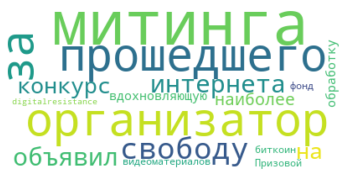

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = data['response']['items'][1]['text']

# comment_mask = np.array(Image.open("C:\!!_info_!!\Desktop\Free_Blue_Star.jpg"))

stopwords = set(STOPWORDS)
stopwords.add("Светов")
stopwords.add("Михаил")

cloud = WordCloud(
    background_color="white", 
    max_words=2000, 
#     mask=comment_mask, 
    stopwords=stopwords, 
#     contour_width=5, 
#     contour_color='steelblue'
)


cloud.generate(text)

plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

cloud.to_file("post_cloud.png");
# the real size of the picture
#Image.open("post_cloud.png")

* Можем ли мы скачать комментарии? Да, для этого есть метод -- https://vk.com/dev/wall.getComments
* В документации по ссылке перечислены обязательные параметры, а также приведен пример запроса и ответа на него. В документации есть такое описание для любого метода.
* Ему нужно передавать идентификаторы записи, комментарии к которой мы хотим получить (эти идентификаторы нам поставляет метод ```wall.get```).
* Чтобы получить ```post_id```, кликните на дату поста, Вы увидите что-то типа https://vk.com/id1?w=wall1_2442097, скопируйте последнее число, в данном случае, 2442097

In [30]:
data = requests.get(
    'https://api.vk.com/method/wall.getComments', 
    params={
        "owner_id": 1,
        "post_id": 2442097,
        "count": 2,
        "need_likes": 1,
        "v":"5.92",
        "access_token": TOKEN
    }
).json()

In [32]:
data

{'response': {'count': 461588,
  'items': [{'id': 2442098,
    'parents_stack': [],
    'date': 1525805968,
    'thread': {'count': 190,
     'items': [],
     'can_post': True,
     'show_reply_button': True,
     'groups_can_post': True},
    'deleted': True},
   {'id': 2442100,
    'from_id': 243752050,
    'post_id': 2442097,
    'owner_id': 1,
    'parents_stack': [],
    'date': 1525805970,
    'text': 'Ну чо пасаны,цифровое сопротивление\nUPD:Го 1К лайков? :D\nUPDD:Чувак сверху спиздил с сохраненки.крыса!!!',
    'likes': {'count': 4209, 'user_likes': 0, 'can_like': 1},
    'attachments': [{'type': 'photo',
      'photo': {'id': 456244482,
       'album_id': -5,
       'owner_id': 243752050,
       'sizes': [{'type': 'm',
         'url': 'https://sun9-47.userapi.com/c850632/v850632550/9685d/LbqEM027b5A.jpg',
         'width': 119,
         'height': 130},
        {'type': 'o',
         'url': 'https://sun9-16.userapi.com/c850632/v850632550/96861/wapqg-NHEdE.jpg',
         'width

#### Задание

* Выкачайте посты или комментарии со своей стены / со стены друга / какого-нибудь сообщества, составьте частотный словарь и визуализируйтетоп 20-30 на графике.

* NB! У сообществ ```id``` начинаются с дефиса — например, ```owner_id=-1``` соответствует идентификатору сообщества ВКонтакте API (club1).

* Можно лемматизировать полученные данные. Тогда, сильно ли отличается верхушка частотного списка без лемматизации и с лемматизацией?

* Какие части речи чаще всего употребляются в выкачанных вами постах? Можно тоже визуализировать их распределение.

* Можно почистить тексты от пунктуации и стоп-слов. Смайлики можно не убирать — вдруг какой-то из них окажется на верхушке частотного списка? А что если посмотреть частотность употребления смайликов? Достать их можно с помощью регулярок, посмотрев их диапазон в [юникодной таблице](https://ru.wikipedia.org/wiki/%D0%AD%D0%BC%D0%BE%D1%82%D0%B8%D0%BA%D0%BE%D0%BD%D1%8B_(%D0%B1%D0%BB%D0%BE%D0%BA_%D0%AE%D0%BD%D0%B8%D0%BA%D0%BE%D0%B4%D0%B0).

